### Student Information
Name:張堂真

Student ID:109065514

GitHub ID:

---

### Instructions

1. First: do the **take home** exercises in the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 22th 11:59 pm, Thursday)__. 

---

### Part 1

In [1]:
### Begin Assignment Here
%load_ext autoreload
%autoreload 2

# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [2]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### **Exercise  2 (take home 1)**

1. I use Dataframe.query() to query certain data I need. For example, I query all the data in column name "category" which greater than 1.

In [3]:
print(X.query('category >= 1'))

                                                   text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

               category_name  
0              comp.graphics  
1              comp.graphics  
2     soc.religion.christian  
3     soc.religion.christian  
4     soc.religi

###  **Exercise 5 (take home 2)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [4]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [5]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

1. In the example data, I find that all of A,B,C describe as NaN. But actually, they are different type of variable. So, in Pandas' function ".isnull", it dicriminate type np.nan, nothing, and None as missing value. The type of 'NaN' and 'None' are string. F is an empty "string".

###  **Exercise 6 (take home 3)** 
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

1. The size of 'X' is changed.
2. It becomes unsorted.
3. Every time I run the sample code, it give a different dataframe.

###  **Exercise 8 (take home 4):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 
![alt txt](https://i.imgur.com/9eO431H.png)

<AxesSubplot:title={'center':'Category distribution'}>

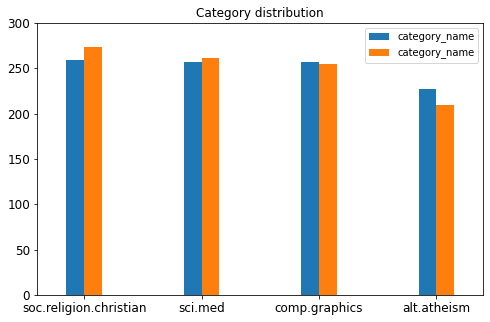

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
# sample two data to plot together
X1 = X.sample(n=1000).category_name.value_counts()
X2 = X.sample(n=1000).category_name.value_counts()
TwoX = pd.DataFrame([X1,X2]).T

width = 0.3
TwoX.plot(kind = 'bar',
          title = 'Category distribution',
          ylim = [0, 300], 
          rot = 0, fontsize = 12, figsize = (8,5),
          width = width)

###  **Exercise 10 (take home 5)** 
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
analyze = count_vect.build_analyzer()

In [8]:
tmp = count_vect.get_feature_names()[0:100]

# create logical array to find the index of target
logi = X_counts[4, 0:100].toarray()==1

Q = []
for i,j in zip(tmp,logi[0]):
    if (j):
        Q.append(i*int(j))
print("The answer of the second '1' is :",Q[1])

The answer of the second '1' is : 01


###  **Exercise 11 (take home 6)** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

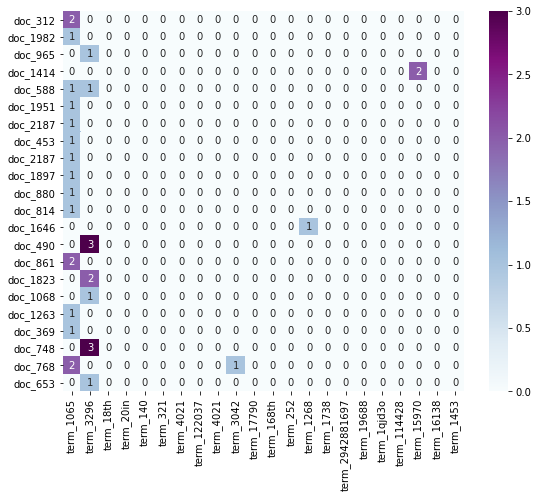

In [9]:
import seaborn as sns

# number of sample
n = 22
i = 0
logi = 1
tmp = np.array(0)
plot_x = []
plot_y = []
while i < n:
    # sampling the data until at least one none zero data appear.
    while ~tmp.any():
        X_sample = X.sample(n = 1).sort_index()
        index = X_sample.index
        tmp = np.array( [ [X_counts[j, i] for i in range(22)] for j in index ] )
    tmp1 = pd.DataFrame(tmp)
    plot_x.append("term_"+str(count_vect.get_feature_names()[index[0]]))
    plot_y.append("doc_"+ str(list(X.index)[index[0]]))
    if logi:
        plot_z = tmp1
        logi = 0
    else:
        plot_z = plot_z.append(tmp1)
    tmp = np.array(0)
    i = i+1
    
plot_z.columns = plot_x
plot_z.index = plot_y

#df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
df_todraw = plot_z
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap = "BuPu",
                 vmin = 0, vmax = plot_z.max().max(), annot = True)

1. I sample the data from dataset and use its corresponding index to extract the data from dataframe.
   Also I set the condition for one of data in X_counts must greater than 1. Then I can sample useful data more efficiently.
2. I sort the data index.
3. Using heatmap for display data.

###  **Exercise 12 (take home 7)** 
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

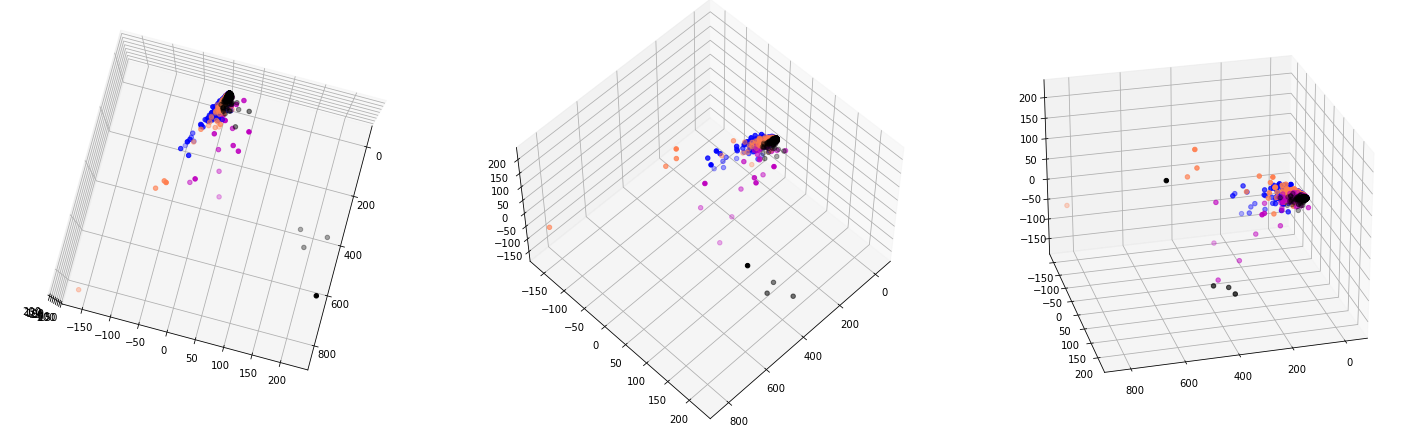

In [10]:
from sklearn.decomposition import PCA

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'm']
# plot
fig = plt.figure(figsize = (25,10))
ax1 = fig.add_subplot(131,projection = '3d')
ax2 = fig.add_subplot(132,projection = '3d')
ax3 = fig.add_subplot(133,projection = '3d')
ax1.view_init(85, 15)
ax2.view_init(55, 45)
ax3.view_init(25, 75)
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    for i in range(1,4):
        locals()['ax%s'%i].scatter(xs, ys, zs, c = c, marker='o')


1. Looking at the left picture, we can easy to see four groups in data.
2. Looking at the middle picture, it shares the same result with left picture.
3. Looking at the right picture, data almost locate at the same place, it is difficult to see there four groups in this data.
4. If we just project the data to 2-D, it is difficult for us to describe the data. That means reducing the dimension would loss the information.

###  **Exercise 13 (take home 8)** 
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [11]:
import plotly.express as px

#col = ['coral', 'blue', 'black', 'm']
i = 0
a = []
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    cs = [category]*len(xs)
    if (len(a)==0):
        data_plot = pd.DataFrame(np.array([xs, ys, zs, cs]).T, columns=['x', 'y', 'z', 'categories'])
        a = [1]
    else:
        data_plot = data_plot.append(pd.DataFrame(np.array([xs, ys, zs, cs]).T, columns=['x', 'y', 'z', 'categories']),
                                     ignore_index = True)
    i = i+1
fig = px.scatter_3d(data_plot, x ='x', y ='y', z ='z', color = 'categories' )
fig.show()

###  **Exercise 14 (take home 9)** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

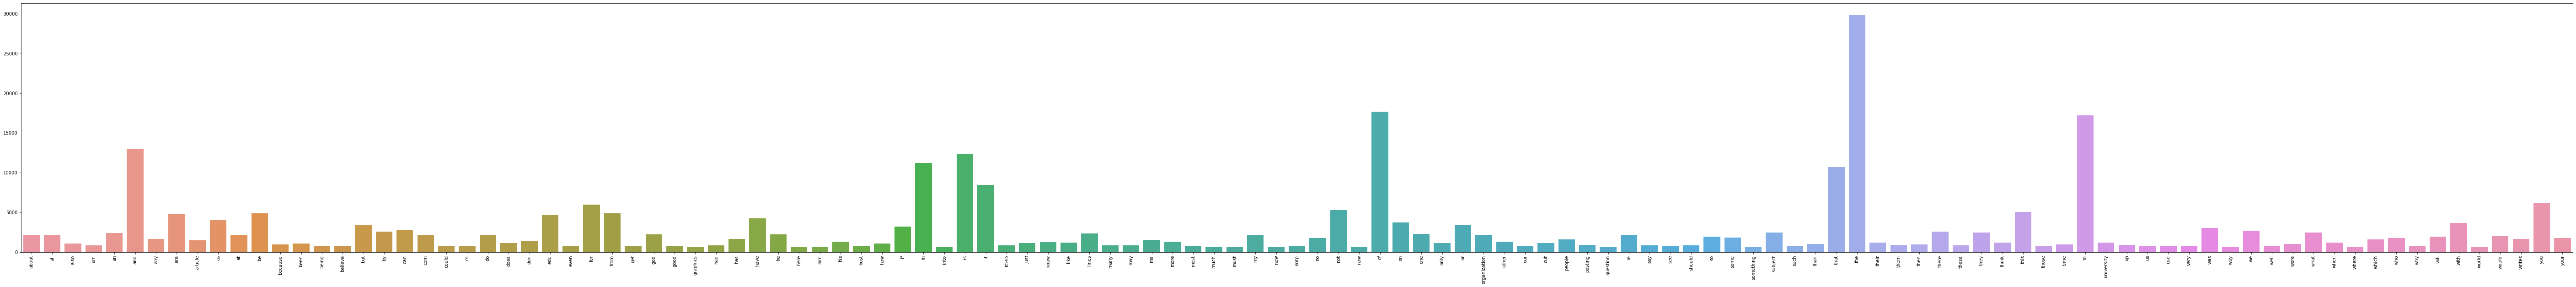

In [12]:
import numpy as np
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

idx = np.squeeze(np.array(np.where(term_frequencies > 30 * np.mean(term_frequencies))))
x = [count_vect.get_feature_names()[i] for i in idx]
y = [term_frequencies[i] for i in idx]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x = x, y = y)
g.set_xticklabels(x, rotation = 90);

1. In this case, I just select the term_frequencies greater than 30 times of data mean. And then show the result in the picture.

###  **Exercise 15 (take home 10)** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

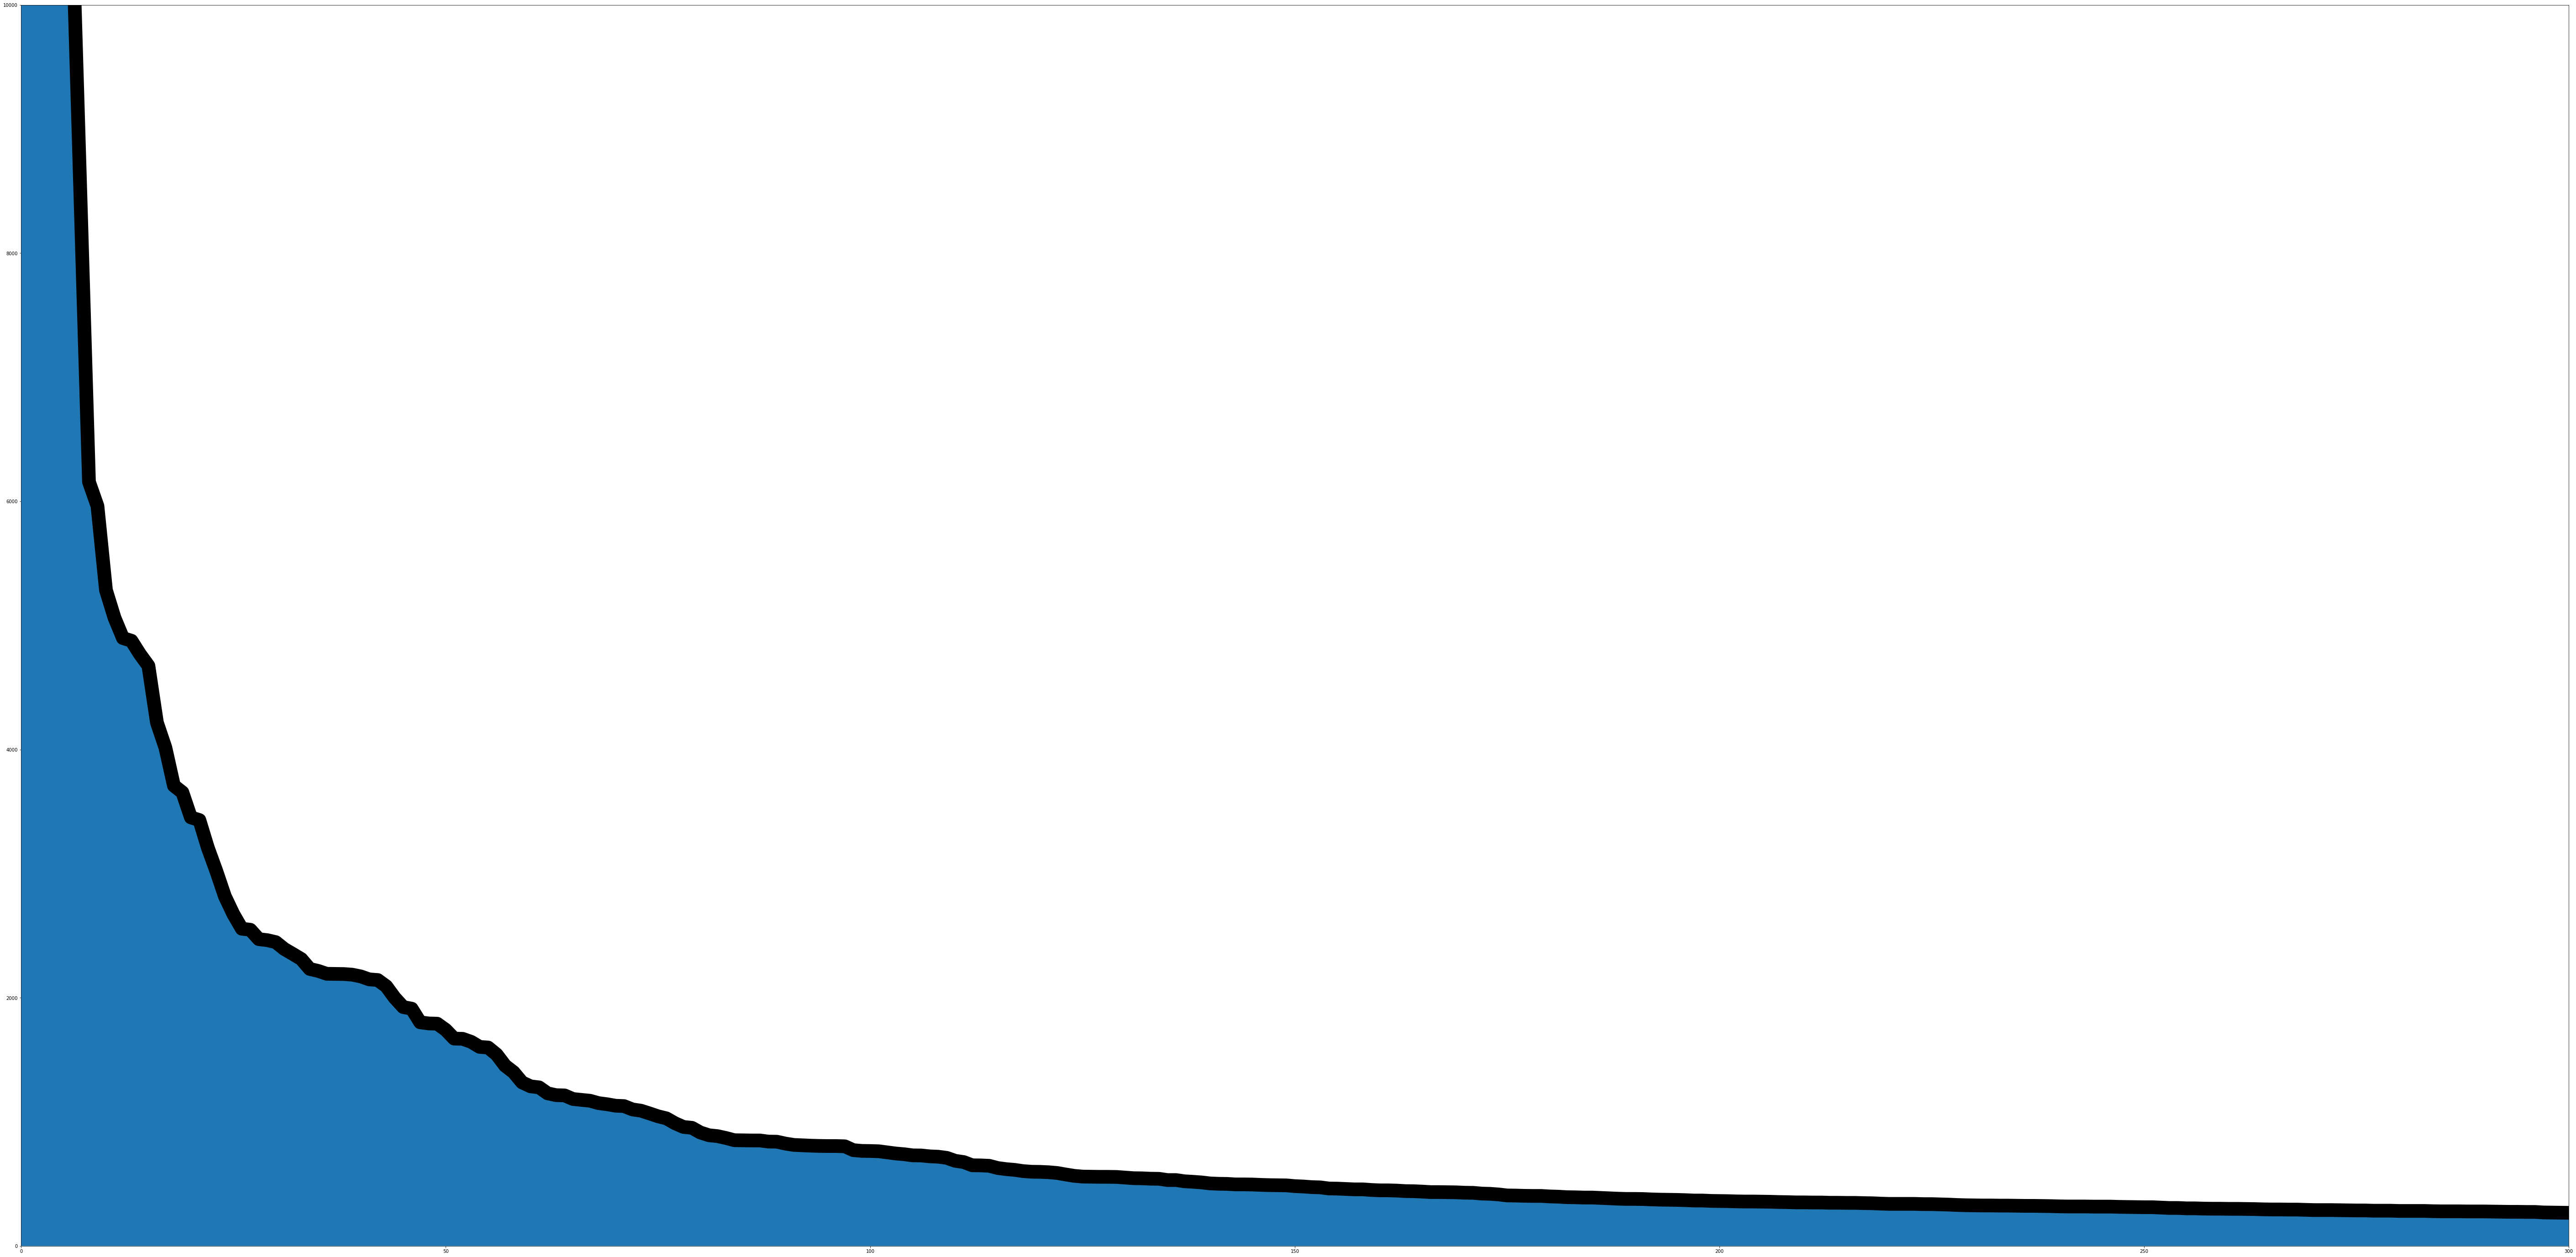

In [13]:
fig = plt.figure(figsize=(100, 50))
ax = fig.add_subplot(111)
y = np.sort(np.asarray(X_counts.sum(axis=0))[0])[::-1]
x = [i for i in range(len(y))]
ax.plot(y, linewidth=30, color = 'k')
plt.xlim(0,300)
plt.ylim(0,10000)
ax.fill_between(x, y)

###  **Exercise 16 (take home 11)** 
Try to generate the binarization using the `category_name` column instead. Does it work?

In [14]:
from sklearn import preprocessing
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name  bin_category  
0           comp.graphics  [0, 1, 0, 0]  
1           comp.graphics  [0, 1, 0, 0]  
2  soc.religion.christian  [0, 0, 0, 1]  
3  soc.religion.christian  [0, 0, 0, 1]  
4  soc.religion.christian  [0, 0, 0, 1]  
5  soc.religion.christian  [0, 0, 0, 1]  
6  soc.religion.christian  [0, 0, 0, 1]  
7                 sci.med  [0, 0, 1, 0]  
8                 sci.med  [0, 0, 1, 0]

1. Yes, it works. The result is the same as by using column category.

---

### Part 2

In [15]:
# import
import os
import glob
import pandas as pd
import numpy as np

import math
import nltk
import helpers.data_mining_helpers as dmh

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

nltk.download('punkt')

%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Leacius\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
# load data
path = os.path.join(os.getcwd() , 'sentiment_labelled_sentences')
all_file = glob.glob(os.path.join(path,'[!r]*txt'))
for i in range(len(all_file)):
    locals()['data%s'%i] = pd.read_table(all_file[i], names=['sentence', 'score'])
    locals()['X%s'%i] = locals()['data%s'%i]
X0

sentence  score
0    So there is no way for me to plug it in here i...      0
1                          Good case, Excellent value.      1
2                               Great for the jawbone.      1
3    Tied to charger for conversations lasting more...      0
4                                    The mic is great.      1
..                                                 ...    ...
995  The screen does get smudged easily because it ...      0
996  What a piece of junk.. I lose more calls on th...      0
997                       Item Does Not Match Picture.      0
998  The only thing that disappoint me is the infra...      0
999  You can not answer calls with the unit, never ...      0

[1000 rows x 2 columns]

In [17]:
X0.loc[lambda f:f.score == 1].iloc[::10, : ][0:5]

sentence  score
1                         Good case, Excellent value.      1
21  I bought this to use with my Kindle Fire and a...      1
44                       Excellent bluetooth headset.      1
61  I really recommend this faceplates since it lo...      1
78  I love this phone , It is very handy and has a...      1

In [18]:
X0.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                               score
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0

In [19]:
X0.isnull().apply(lambda x: dmh.check_missing_values(x),axis = 1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
995    (The amoung of missing records is: , 0)
996    (The amoung of missing records is: , 0)
997    (The amoung of missing records is: , 0)
998    (The amoung of missing records is: , 0)
999    (The amoung of missing records is: , 0)
Length: 1000, dtype: object

In [20]:
X_sample = X0.sample(n=100)
X_sample[0:4]

sentence  score
935  However, after about a year, the fliptop start...      0
667  Looks good in the picture, but this case was a...      0
943                                I'm returning them.      0
727  Other than that, the leather is nice and soft;...      1

1    500
0    500
Name: score, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

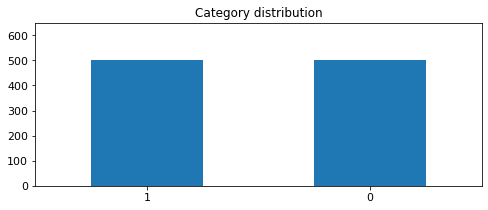

In [21]:
print(X0.score.value_counts())

# plot barchart for X_sample
X0.score.value_counts().plot(kind = 'bar',
                            title = 'Category distribution',
                            ylim = [0, 650],
                            rot = 0, fontsize = 11, figsize = (8,3))

<AxesSubplot:title={'center':'Category distribution'}>

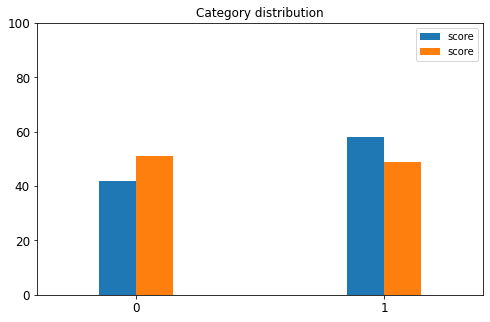

In [22]:
# sample two data to plot together
X_test1 = X0.sample(n=100).score.value_counts()
X_test2 = X0.sample(n=100).score.value_counts()
TwoX = pd.DataFrame([X_test1,X_test2]).T

width = 0.3
TwoX.plot(kind = 'bar',
          title = 'Category distribution',
          ylim = [0, 100], 
          rot = 0, fontsize = 12, figsize = (8,5),
          width = width)

In [23]:
# takes a like a minute or two to process
X0['unigrams'] = X0['sentence'].apply(lambda x: dmh.tokenize_text(x))
X0[0:4]

sentence  score  \
0  So there is no way for me to plug it in here i...      0   
1                        Good case, Excellent value.      1   
2                             Great for the jawbone.      1   
3  Tied to charger for conversations lasting more...      0   

                                            unigrams  
0  [So, there, is, no, way, for, me, to, plug, it...  
1               [Good, case, ,, Excellent, value, .]  
2                      [Great, for, the, jawbone, .]  
3  [Tied, to, charger, for, conversations, lastin...

In [24]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X0.sentence)
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

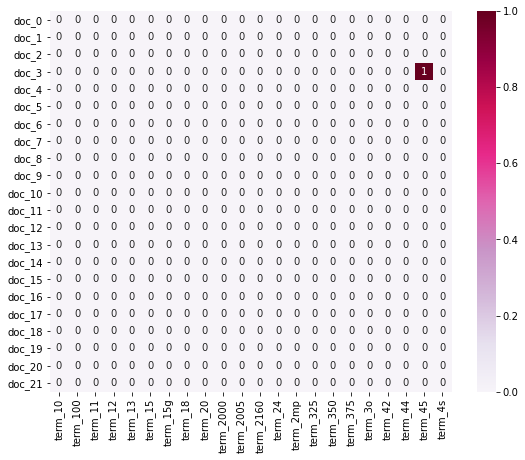

In [25]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:22]]
plot_y = ["doc_"+ str(i) for i in list(X0.index)[0:22]]
plot_z = X_counts[0:22, 0:22].toarray()
# draw
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

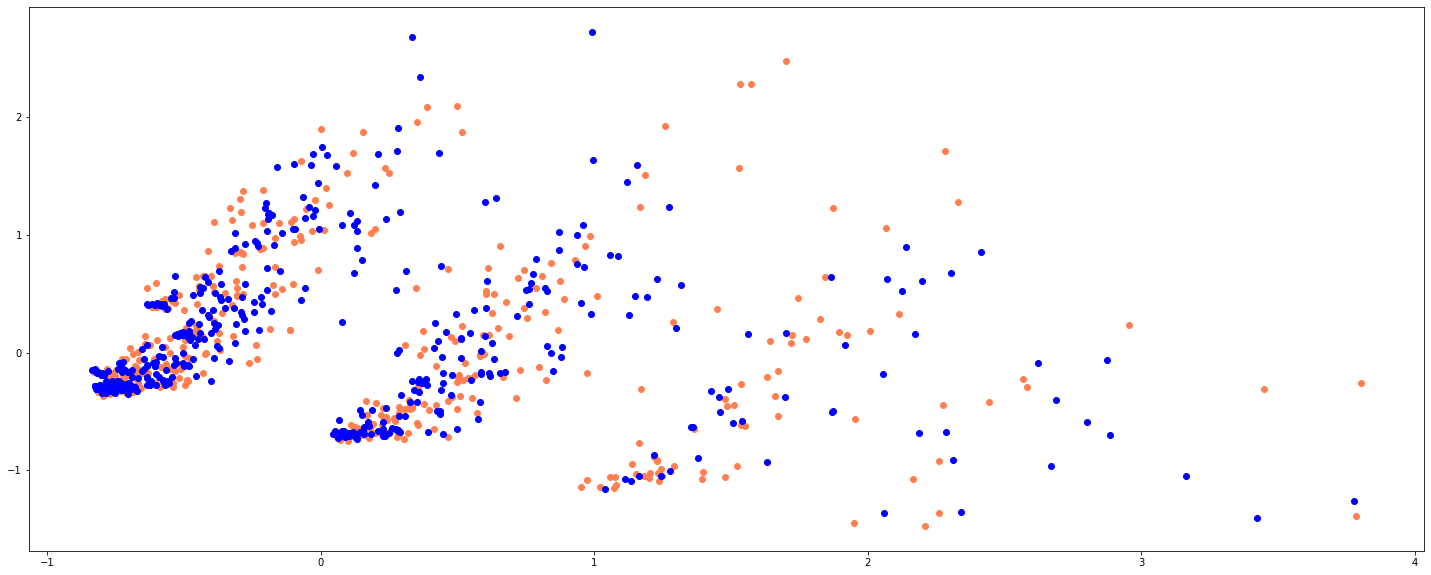

In [26]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
col = ['coral', 'blue']
label = [0,1]
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, label):
    xs = X_reduced[X0['score'] == category].T[0]
    ys = X_reduced[X0['score'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

In [27]:
import plotly.express as px

i = 0
a = []
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
for c, category in zip(col, label):
    xs = X_reduced[X0['score'] == category].T[0]
    ys = X_reduced[X0['score'] == category].T[1]
    zs = X_reduced[X0['score'] == category].T[2]
    cs = [category]*len(xs)
    if (len(a)==0):
        data_plot = pd.DataFrame(np.array([xs, ys, zs, cs]).T, columns=['x', 'y', 'z', 'score'])
        a = [1]
    else:
        data_plot = data_plot.append(pd.DataFrame(np.array([xs, ys, zs, cs]).T, columns=['x', 'y', 'z', 'score']),
                                     ignore_index = True)
    i = i+1
fig = px.scatter_3d(data_plot, x ='x', y ='y', z ='z', color = 'score' )
fig.show()

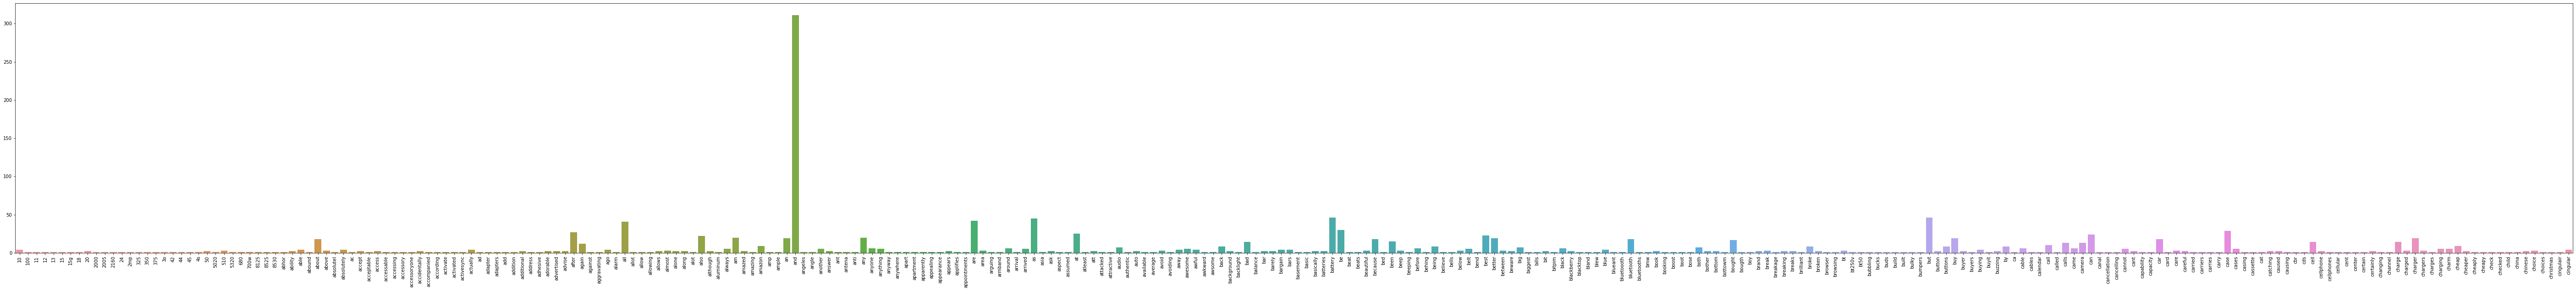

In [28]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
# plot
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

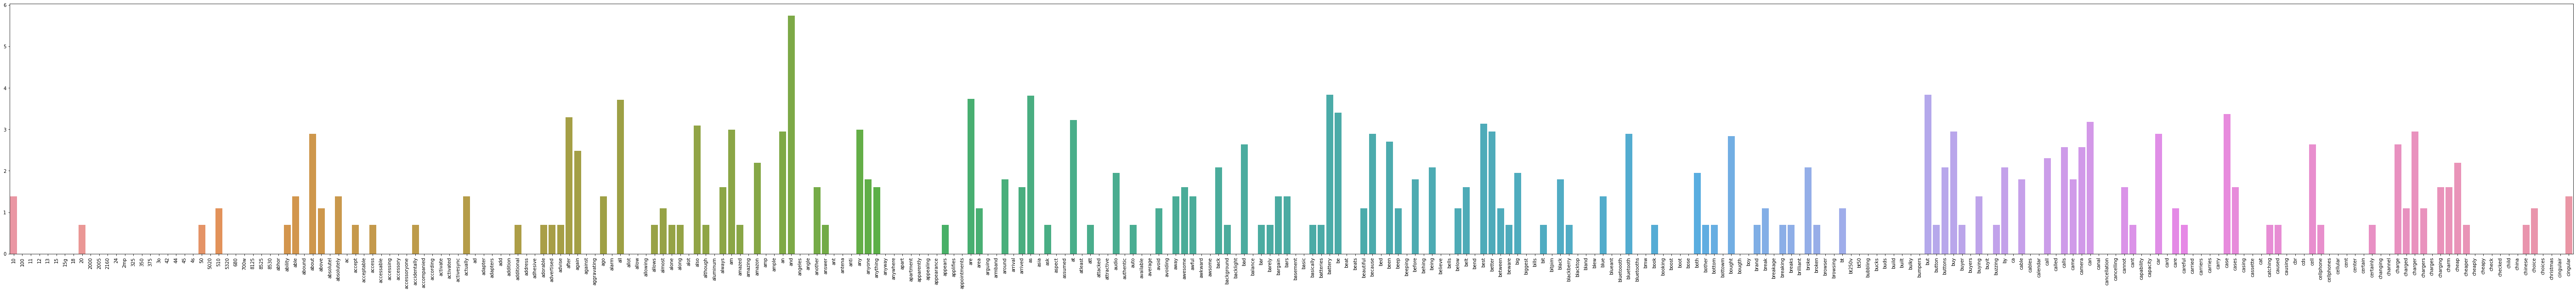

In [29]:
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [30]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X0.score)
X0['bin_score'] = mlb.transform(X0['score']).tolist()
X0[0:9]

sentence  score  \
0  So there is no way for me to plug it in here i...      0   
1                        Good case, Excellent value.      1   
2                             Great for the jawbone.      1   
3  Tied to charger for conversations lasting more...      0   
4                                  The mic is great.      1   
5  I have to jiggle the plug to get it to line up...      0   
6  If you have several dozen or several hundred c...      0   
7        If you are Razr owner...you must have this!      1   
8                Needless to say, I wasted my money.      0   

                                            unigrams bin_score  
0  [So, there, is, no, way, for, me, to, plug, it...       [0]  
1               [Good, case, ,, Excellent, value, .]       [1]  
2                      [Great, for, the, jawbone, .]       [1]  
3  [Tied, to, charger, for, conversations, lastin...       [0]  
4                           [The, mic, is, great, .]       [1]  
5  [I, have, to, jiggle, the, plug, to, get, it, ...       [0]  
6  [If, you, have, several, dozen, or, several, h...       [0]  
7  [If, you, are, Razr, owner, ..., you, must, ha...       [1]  
8    [Needless, to, say, ,, I, wasted, my, money, .]       [0]

### Part 3

In [31]:
y = np.sort(np.asarray(term_frequencies))[::-1][:10]
tmp = []
y = np.unique(y)[::-1]
for i in y:
    for j in np.array(np.where(term_frequencies == i))[0]:
        tmp.append(j)
values = term_frequencies[tmp]
names = np.array(count_vect.get_feature_names())[tmp]
# plot
fig = go.Figure(data=[go.Pie(labels=names, values=values, pull=[0.2, 0.15, 0, 0], textinfo ='label+percent',
                      insidetextorientation='radial')])
fig.show()

1. Top 10 most commonly used words using in the data. Show in a pie chart
https://plotly.com/python/pie-charts/

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
for i in range(3):
    locals()['X%s_counts'%i] = vectorizer.fit_transform(locals()['X%s'%i].sentence)
    locals()['X%s_features_names'%i] = vectorizer.get_feature_names()
    locals()['term_frequencies%s'%i] = np.asarray(locals()['X%s_counts'%i].sum(axis=0))[0]
    locals()['term_frequencies_log%s'%i] = [math.log(i) for i in locals()['term_frequencies%s'%i]]
    locals()['X%s_features'%i] = np.asarray(locals()['X%s_counts'%i].T.sum(axis=0))[0]
    locals()['features_log%s'%i] = [math.log(i) for i in locals()['X%s_features'%i]]

<Figure size 432x288 with 0 Axes>

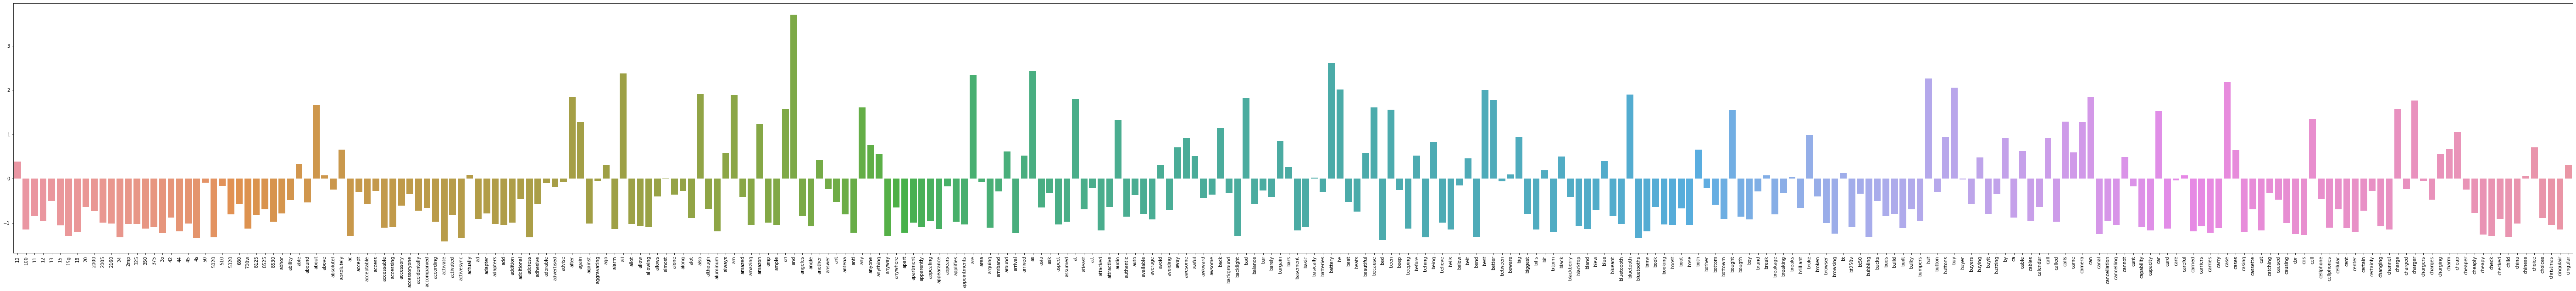

<Figure size 432x288 with 0 Axes>

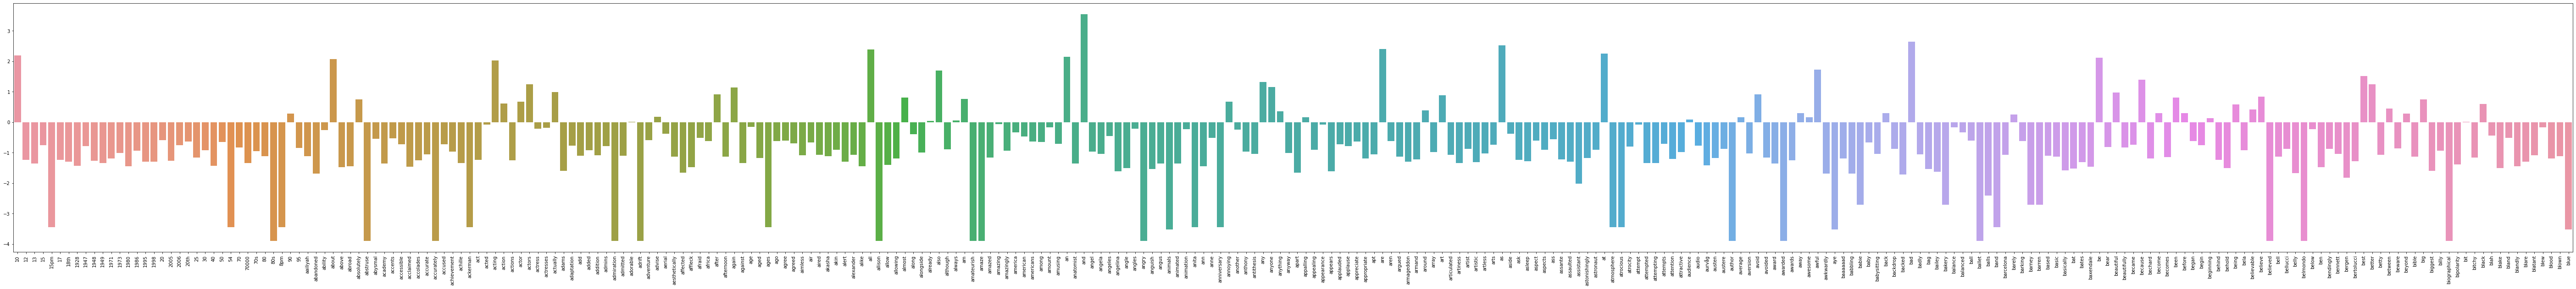

<Figure size 432x288 with 0 Axes>

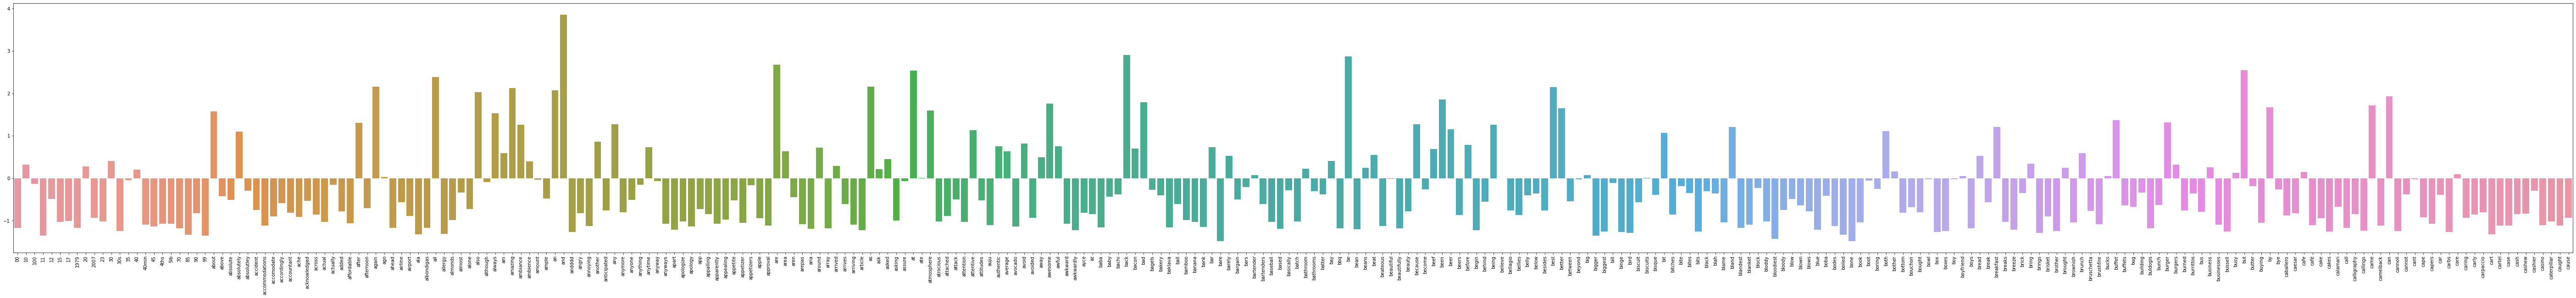

In [33]:
for i in range(3):
    plt.figure()
    plt.subplots(figsize=(100, 10))
    g = sns.barplot(x=locals()['X%s_features_names'%i][:300],
                    y=locals()['term_frequencies_log%s'%i][:300])
    g.set_xticklabels(locals()['X%s_features_names'%i][:300], rotation = 90);

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [35]:
labels = X0.score
gnb1 = GaussianNB()

# TF-IDF features 
X_train, X_test, Y_train, Y_test = train_test_split(X0_counts.toarray(), labels, test_size=0.2)
gnb1.fit(X_train, Y_train)
# predic
y_pre1 = gnb1.predict(X_test)
# accuracy
acc = sum(y_pre1 == Y_test)/len(Y_test)
print('The accuracy of TF-IDF features : %s' % acc)
frame_TF_IDF = {'data':list(X_test), 'labels': Y_test, 'prediction': y_pre1}
frame_TF_IDF = pd.DataFrame(frame_TF_IDF)
frame_TF_IDF

The accuracy of TF-IDF features : 0.725


data  labels  prediction
879  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       1           1
700  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       0           0
727  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       1           1
19   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       0           1
128  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       1           1
..                                                 ...     ...         ...
230  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       0           0
887  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       1           1
788  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       1           0
557  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       1           1
984  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       0           0

[200 rows x 3 columns]

In [36]:
# word frequency features
X_train, X_test, Y_train, Y_test = train_test_split(X_counts.toarray(), labels, test_size=0.2)
gnb2 = GaussianNB()
gnb2.fit(X_train, Y_train)
y_pre2 = gnb2.predict(X_test)
# accuracy
acc = sum(y_pre2 == Y_test)/len(Y_test)
print('The accuracy of word frequency features : %s'%acc)
frame_TF_IDF2 = {'data':list(X_test), 'labels': Y_test, 'prediction': y_pre2}
frame_TF_IDF2 = pd.DataFrame(frame_TF_IDF2)
frame_TF_IDF2

The accuracy of word frequency features : 0.705


data  labels  prediction
133  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       1           1
469  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       1           0
857  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       1           1
691  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       1           1
956  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       1           0
..                                                 ...     ...         ...
983  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       0           0
151  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       0           0
359  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       1           1
58   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       1           0
139  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       1           1

[200 rows x 3 columns]

### Part 4

1. In lab1, I learn about how to deal with text data through some toolkits, like pandas. We extract category and category_name together. I think that these two information are the same. During dealing with data, We can just use the name as the label of the data. Threr are two advantage.One is to save memory, the other is more easy to deal with the data.
2. When we extract some of elements in array, We just use "[]". I think that we can use iloc or loc. It can provide more convenience to extract elements. And calculate faster.
3. If we just want to know the distribution shape, we can sample data in dataset to represent the dataset. It can save the calculate time.